### Step 2 - Data curration, exploration and examples of statistical analysis

#### This Python notebook will demonstrate how to currate and explore the data obtained in the Step 1

#### Additionally it will demonstrate some basic statistical analysis methods in Python using Pingouin and Scipy.stats packages, as well as figure plotting with Seaborn package

In [3]:
# Module importing

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import re
import seaborn as sns
import pingouin as pg
from pingouin import kruskal, read_dataset
from scipy.stats import norm
from statannot import add_stat_annotation

In [4]:
# Dataframe loading from the downloaded .csv files from Step 1.
# Brain region: cerebellum; species: all; cell: principal.

df=pd.read_csv('NM_cerebellum_All_principal cell.csv', index_col='Neuron ID')
df

,Neuron Name,Archive,Note,Age Scale,Gender,Age Classification,Brain Region,Cell Type,Species,Strain,...,Path distance,Branching order,Contraction,Fragmentation,Partition asymmetry,Pk classic,Bifurcation angle local,Fractal dimension,Bifurcation angle remote,Length
NeuronID,,,,,,,,,,,,,,,,,,,,,
10069,Purkinje-slice-ageP43-6,Dusart,None,Day,Not reported,young adult,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['Purkinje', 'principal cell']",mouse,C56BL/6,...,265.970,33.0,0.940000,4153.0,0.500000,1.36,78.0000,1.03000,65.5600,6438.62
10070,Purkinje-slice-ageP37-5,Dusart,None,Day,Not reported,young adult,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['Purkinje', 'principal cell']",mouse,C56BL/6,...,229.820,27.0,0.950000,2504.0,0.530000,1.46,77.1300,1.02000,65.4700,5128.31
10071,Purkinje-slice-ageP35-4,Dusart,None,Day,Not reported,young adult,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['Purkinje', 'principal cell']",mouse,C56BL/6,...,311.410,27.0,0.930000,4170.0,0.510000,1.36,86.2800,1.03000,66.5100,6560.56
10072,Purkinje-slice-ageP35-2,Dusart,None,Day,Not reported,young adult,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['Purkinje', 'principal cell']",mouse,C56BL/6,...,275.720,24.0,0.940000,3111.0,0.550000,1.43,76.7700,1.02000,63.5600,6052.74
10073,Purkinje-slice-ageP35-1,Dusart,None,Day,Not reported,young adult,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['Purkinje', 'principal cell']",mouse,C56BL/6,...,233.780,30.0,0.950000,1713.0,0.540000,1.53,79.1500,1.02000,70.1200,4948.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99872,Blob6_KO_NOex-783,Hoxha,apical location on cerebellar lobules of purki...,Month,Male/Female,old,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['principal cell', 'Purkinje', 'GABAergic', 'S...",mouse,C57BL/6J,...,250.949,50.0,0.941982,4436.0,0.601969,2.00,88.1448,1.02884,80.9647,4080.55
99873,Blob8_KO_796,Hoxha,apical location on cerebellar lobules of purki...,Month,Male/Female,old,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['principal cell', 'Purkinje', 'GABAergic', 'S...",mouse,C57BL/6J,...,209.886,33.0,0.912525,5528.0,0.583378,2.00,85.4298,1.04206,68.2227,5583.49
99874,Clob6_KO_796,Hoxha,apical location on cerebellar lobules of purki...,Month,Male/Female,old,"['cerebellum', 'cerebellar cortex', 'Purkinje ...","['principal cell', 'Purkinje', 'GABAergic', 'S...",mouse,C57BL/6J,...,211.858,41.0,0.905764,5259.0,0.597374,2.00,92.3662,1.05142,81.2635,5760.78


In [5]:
# Listing the columns names in the dataframe.

df.columns

Index(['Neuron Name', 'Archive', 'Note', 'Age Scale', 'Gender',
       'Age Classification', 'Brain Region', 'Cell Type', 'Species', 'Strain',
       'Scientific Name', 'Stain', 'Experiment Condition', 'Protocol',
       'Slicing Direction', 'Reconstruction Software', 'Objective Type',
       'Original Format', 'Domain', 'Attributes', 'Magnification',
       'Upload Date', 'Deposition Date', 'Shrinkage Reported',
       'Shrinkage Corrected', 'Reported Value', 'Reported XY', 'Reported Z',
       'Corrected Value', 'Corrected XY', 'Corrected Z', 'Slicing Thickness',
       'Min Age', 'Max Age', 'Min Weight', 'Max Weight', 'Png URL',
       'Reference PMID', 'Reference DOI', 'Physical Integrity', 'Neuron ID',
       'Surface', 'Volume', 'Soma surface', 'Number of stems',
       'Number of bifurcations', 'Number of branches', 'Width', 'Height',
       'Depth', 'Diameter', 'Euclidian distance', 'Path distance',
       'Branching order', 'Contraction', 'Fragmentation',
       'Partition asy

In [7]:
# Obtaining the output results for each specific column from the dataframe.

def col_report(df, colname):
    print ('contents of', colname)
    for s in set(df[colname]):
        print ('   ', s, df[df[colname]==s].shape[0])

In [8]:
col_report(df, 'Cell Type')

contents of Cell Type
    ['principal cell'] 285
    ['Large', 'glutamatergic', 'principal cell'] 5
    ['granule', 'principal cell'] 62
    ['principal cell', 'Purkinje', 'projection'] 31
    ['principal cell', 'Purkinje', 'GABAergic', 'Spontaneously firing'] 18
    ['principal cell', 'projection'] 1
    ['principal cell', 'eurydendroid'] 116
    ['principal cell', 'Purkinje'] 1256
    ['Purkinje', 'principal cell'] 17


In [9]:
col_report(df, 'Species')

contents of Species
    guinea pig 3
    Tiger 10
    mouse 417
    chimpanzee 16
    humpback whale 10
    zebrafish 807
    giraffe 15
    rat 502
    human 5
    clouded leopard 6


In [10]:
col_report(df, 'Experiment Condition')

contents of Experiment Condition
    ['spinocerebellar ataxia type 6 model'] 9
    ['SK-2 knockout'] 17
    ['CSF1 depletion'] 57
    ['Elovl5 knockout'] 9
    ['Knockout'] 4
    ['Gjd2b-/- mutant'] 123
    ['rescue expressing full length Gjd2b'] 15
    ['CaMKII inhibitor treatment'] 45
    ['KCl treatment'] 84
    ['Control'] 1417
    ['paternally transmitted chromosomal duplication'] 6
    ['Nestin-Mfp2 knockout'] 5


In [11]:
col_report(df, 'Domain')

contents of Domain
    Dendrites, Soma, No Axon 195
    Dendrites, No Soma, No Axon 576
    Dendrites, Soma, Axon 73
    No Dendrites, No Soma, Axon 494
    Neurites, Soma 401
    No Dendrites, Soma, Axon 52


In [12]:
col_report(df, 'Stain')

contents of Stain
    horseradish peroxidase 3
    Biocytin, Streptavidin-Alexa 633 8
    immunostaining 462
    biocytin 174
    Texas red 132
    Alexa Fluor 594 1
    green fluorescent protein 776
    Golgi-Scheibel 62
    lucifer yellow 5
    Endogenous fluorescence 52
    Golgi 50
    Alexa Fluor 488 18
    enhanced green fluorescent protein 48


In [13]:
# obtaining the output results based on two column parameters

def col_report2(df, colname1, colname2):
    print ('Contents of', colname1, 'by', colname2)
    grouping = df.groupby(colname1)
    for s in set(df[colname1]):
        print (' ', s, df[df[colname1]==s].shape[0])
        grouping_s=grouping.get_group(s)
        for x in set(grouping_s[colname2]):
            print ('     ', x, grouping_s[grouping_s[colname2]==x].shape[0])

In [14]:
col_report2(df,'Species','Cell Type')

Contents of Species by Cell Type
  guinea pig 3
      ['Purkinje', 'principal cell'] 3
  Tiger 10
      ['granule', 'principal cell'] 10
  mouse 417
      ['principal cell', 'Purkinje', 'GABAergic', 'Spontaneously firing'] 18
      ['principal cell', 'Purkinje', 'projection'] 31
      ['principal cell', 'projection'] 1
      ['principal cell', 'Purkinje'] 356
      ['Purkinje', 'principal cell'] 11
  chimpanzee 16
      ['granule', 'principal cell'] 16
  humpback whale 10
      ['granule', 'principal cell'] 10
  zebrafish 807
      ['principal cell', 'eurydendroid'] 116
      ['principal cell', 'Purkinje'] 406
      ['principal cell'] 285
  giraffe 15
      ['granule', 'principal cell'] 15
  rat 502
      ['principal cell', 'Purkinje'] 494
      ['Large', 'glutamatergic', 'principal cell'] 5
      ['Purkinje', 'principal cell'] 3
  human 5
      ['granule', 'principal cell'] 5
  clouded leopard 6
      ['granule', 'principal cell'] 6


In [15]:
col_report2(df,'Species','Stain')

Contents of Species by Stain
  guinea pig 3
      horseradish peroxidase 3
  Tiger 10
      Golgi-Scheibel 10
  mouse 417
      Biocytin, Streptavidin-Alexa 633 8
      immunostaining 1
      biocytin 167
      Alexa Fluor 594 1
      green fluorescent protein 120
      lucifer yellow 4
      Golgi 50
      Alexa Fluor 488 18
      enhanced green fluorescent protein 48
  chimpanzee 16
      Golgi-Scheibel 16
  humpback whale 10
      Golgi-Scheibel 10
  zebrafish 807
      Endogenous fluorescence 52
      immunostaining 401
      green fluorescent protein 354
  giraffe 15
      Golgi-Scheibel 15
  rat 502
      Texas red 132
      immunostaining 60
      biocytin 7
      green fluorescent protein 302
      lucifer yellow 1
  human 5
      Golgi-Scheibel 5
  clouded leopard 6
      Golgi-Scheibel 6


In [16]:
col_report2(df,'Species','Gender')

Contents of Species by Gender
  guinea pig 3
      Not reported 3
  Tiger 10
      Female 10
  mouse 417
      Male 148
      Male/Female 63
      Female 183
      Not reported 23
  chimpanzee 16
      Male/Female 16
  humpback whale 10
      Male 10
  zebrafish 807
      Not reported 807
  giraffe 15
      Male 15
  rat 502
      Not reported 502
  human 5
      Male 5
  clouded leopard 6
      Female 6


In [17]:
# total number of cells in the dataset

print (df.shape[0], 'cells')

1791 cells


In [18]:
# Filtering for only Purkinje cells, with dendrites and no axon, from Control conditions.

filter_df=df[df['Cell Type'].str.contains('Purkinje') & df['Experiment Condition'].str.contains('Control') & 
   df['Domain'].str.contains('Dendrites, No Soma, No Axon', 'Dendrites, Soma, No Axon')]
print (filter_df.shape[0], 'cells')

295 cells


In [19]:
col_report2(filter_df,'Species','Gender')

Contents of Species by Gender
  guinea pig 3
      Not reported 3
  zebrafish 171
      Not reported 171
  mouse 121
      Male 14
      Male/Female 21
      Female 86


In [20]:
# Eliminating guinea pig since there is only 3 cells.

mouse_zebra=filter_df[filter_df['Species'].isin(['mouse','zebrafish'])]

In [21]:
# Saving the mouse_zebra dataframe as a .csv file for use in later .ipynb examples.

mouse_zebra.to_csv("./mouse_zebra.csv", index=False)

In [22]:
# Description with custom percentiles.

mouse_zebra.describe(percentiles=[0.25, 0.5, 0.75]).round(2)

,Surface,Volume,Soma surface,Number of stems,Number of bifurcations,Number of branches,Width,Height,Depth,Diameter,...,Path distance,Branching order,Contraction,Fragmentation,Partition asymmetry,Pk classic,Bifurcation angle local,Fractal dimension,Bifurcation angle remote,Length
count,292.00,292.00,0.0,292.00,292.00,292.00,292.00,292.00,292.00,292.00,...,292.00,292.00,292.00,292.00,292.00,292.00,292.00,292.00,292.00,292.00
mean,3877.31,999.30,NaN,1.64,80.39,162.42,52.30,78.05,13.59,0.41,...,152.74,20.73,0.88,1338.76,0.60,2.01,101.77,1.09,94.12,1519.82
std,12014.52,3385.12,NaN,0.48,104.82,209.65,129.83,168.88,11.83,0.30,...,381.02,15.45,0.06,3274.39,0.10,0.08,21.85,0.05,16.77,3904.03
min,32.13,2.01,NaN,1.00,2.00,5.00,2.00,7.04,0.00,0.20,...,6.46,2.00,0.69,66.00,0.00,1.47,27.19,1.01,59.47,40.91
25%,97.55,5.98,NaN,1.00,12.00,26.00,3.98,15.98,2.46,0.25,...,20.35,9.00,0.83,387.00,0.56,2.00,82.99,1.05,78.38,116.23
50%,136.15,9.25,NaN,2.00,23.00,48.00,12.32,25.88,12.25,0.25,...,49.12,13.00,0.86,583.00,0.60,2.00,106.38,1.11,97.22,152.61
75%,321.21,62.80,NaN,2.00,124.25,249.75,18.52,38.51,21.86,0.60,...,72.85,33.00,0.95,1016.75,0.64,2.00,118.40,1.13,106.57,230.85
max,63302.90,21997.20,NaN,2.00,558.00,1118.00,844.23,985.96,72.09,1.77,...,2511.31,90.00,0.97,32253.00,0.94,2.46,175.93,1.20,133.24,20150.00


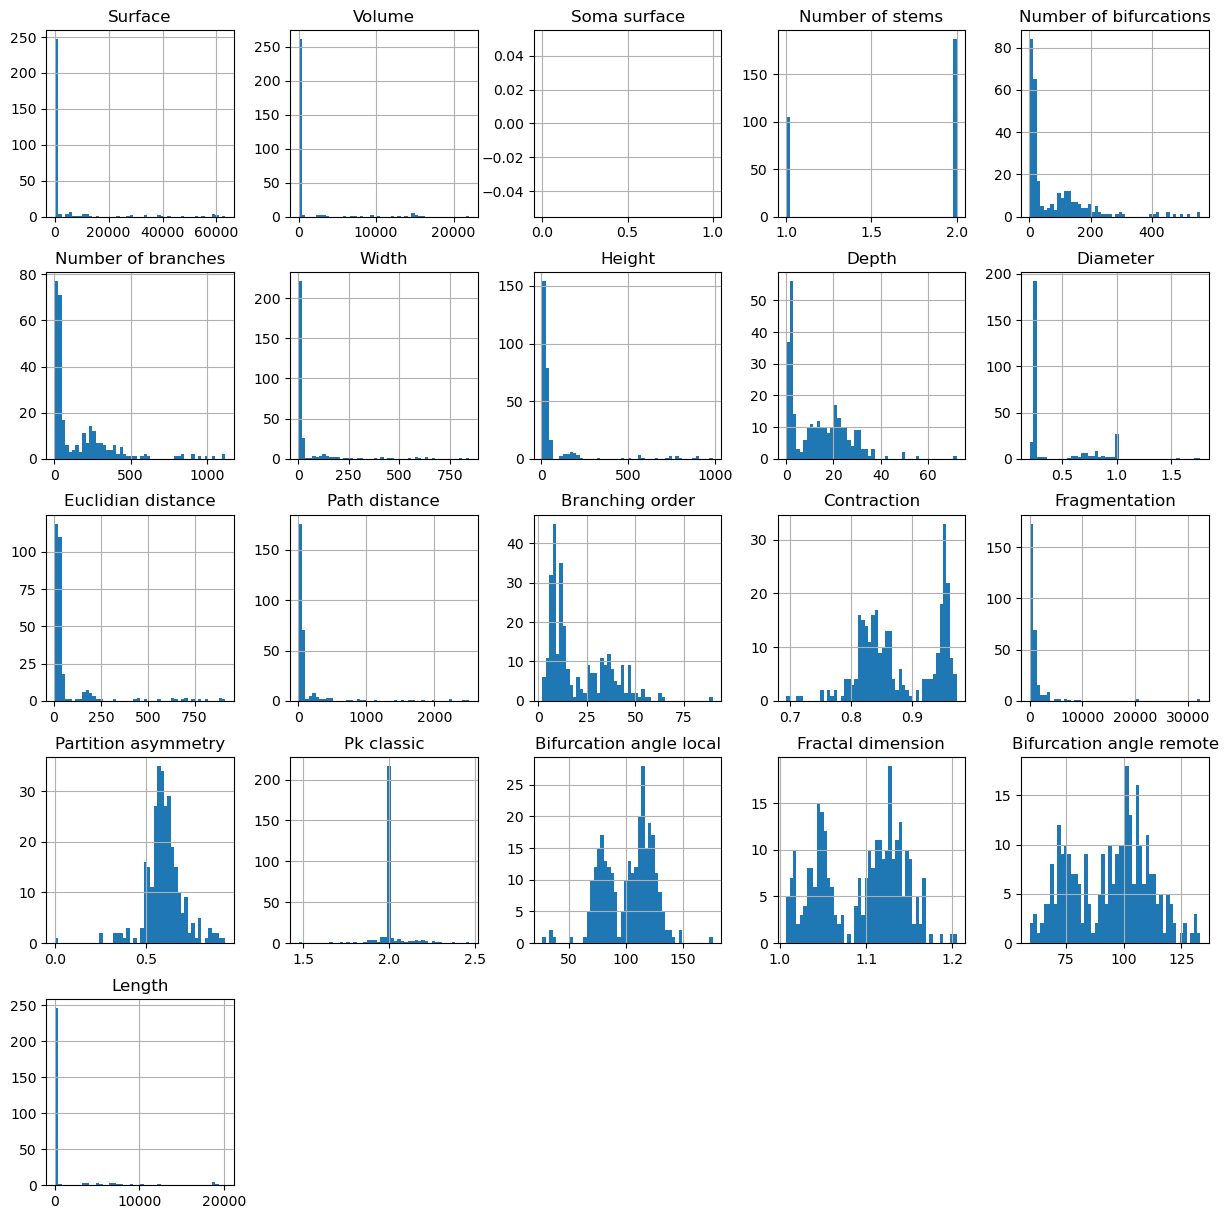

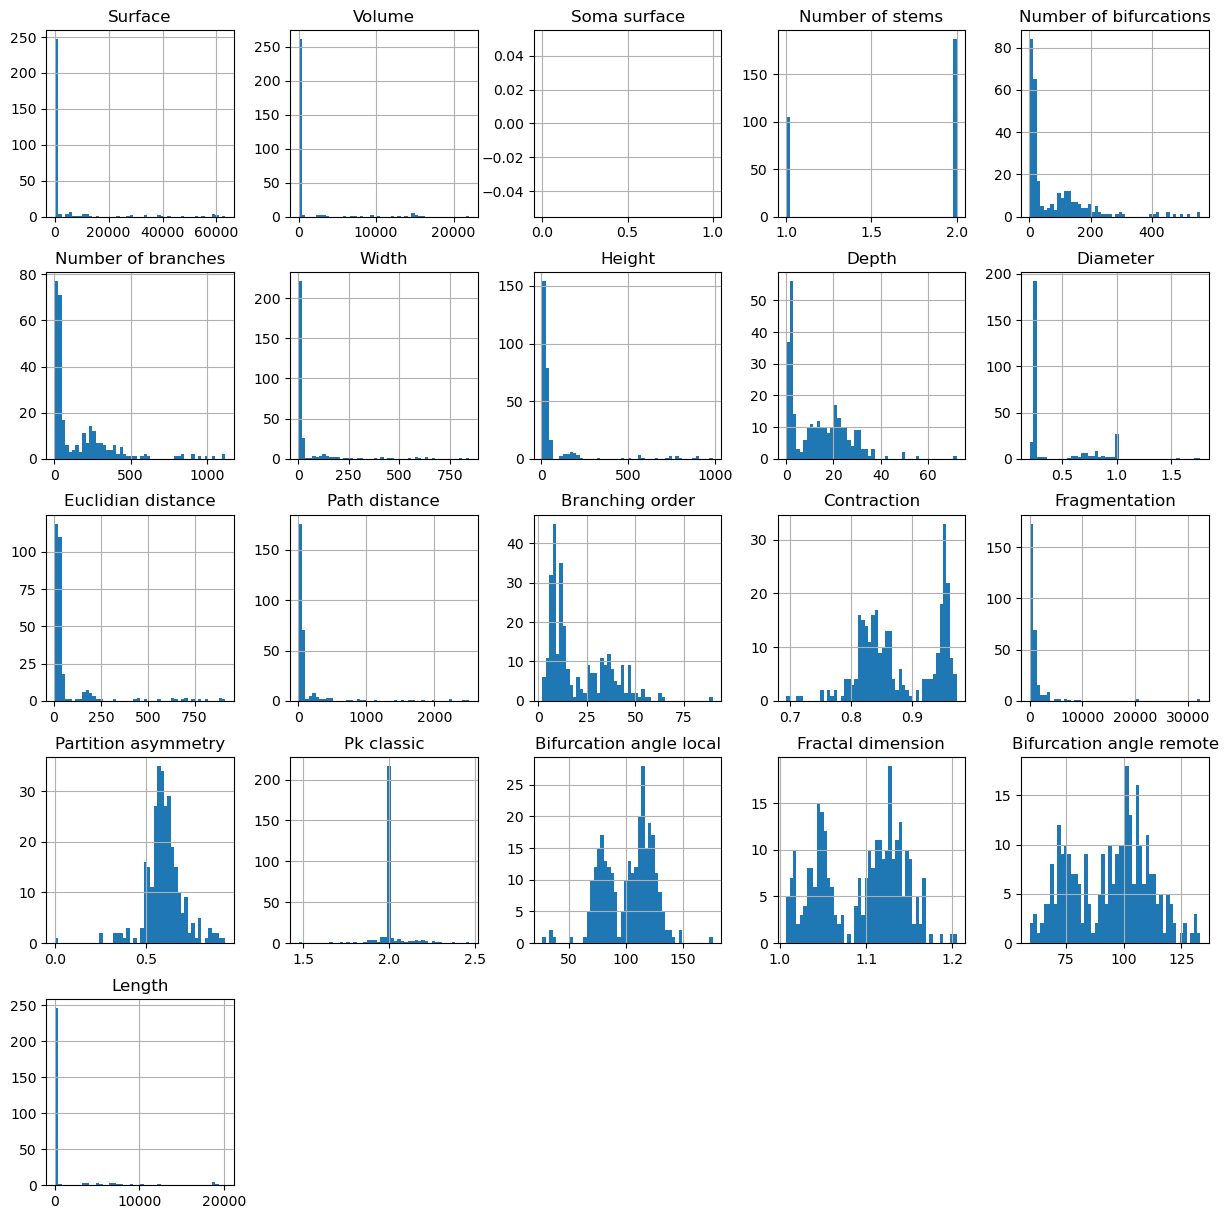

In [52]:
# Histogram plotting of mouse and zebrafish morphometric 

mouse_zebra.hist(bins=50, figsize=(15,15))
plt.show()

In [40]:
# Making a new variable called uservars in which we can place morphometric parameters that are of special interest to us.
# this can be used later for easier analysis and plotting.

usevars = ['Number of stems',"Number of bifurcations", 'Number of branches', 'Branching order', 'Path distance']

In [ ]:
# Next are examples of certain Seaborn graphs that can be used to represent the data we have obtained.

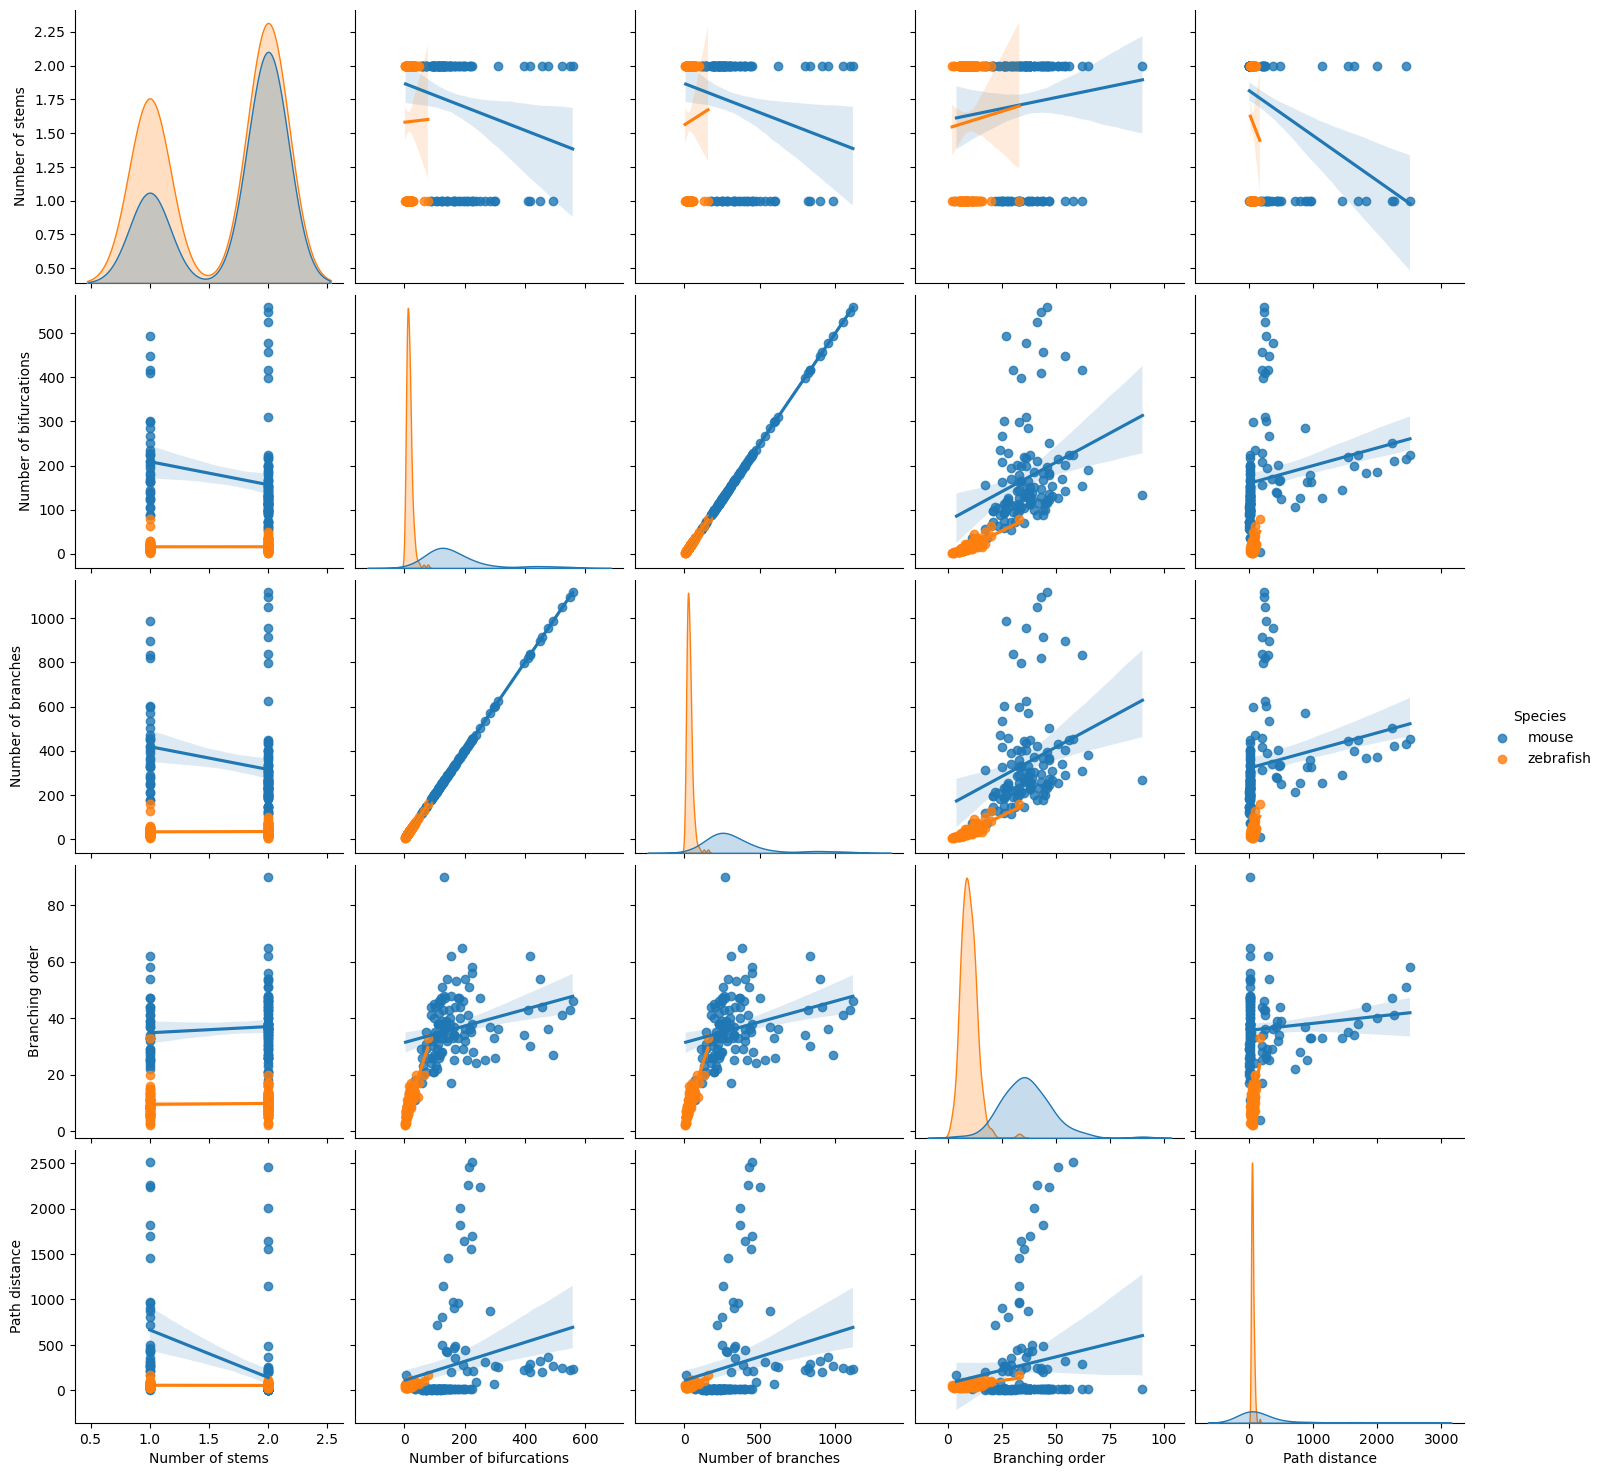

In [40]:
sns.pairplot(mouse_zebra, vars = usevars, hue = 'Species', kind='reg', diag_kind="kde", height=3)
plt.show()

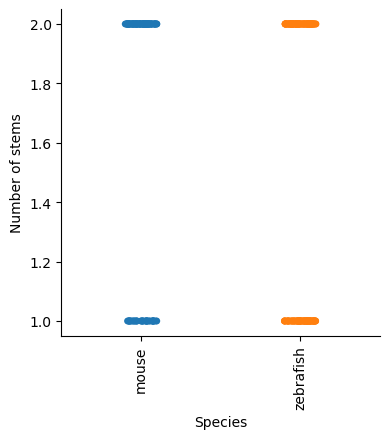

In [41]:
ax = sns.catplot(x="Species", y="Number of stems", data=mouse_zebra, height=4, aspect=1)
ax.set_xticklabels(rotation=90)
plt.show()

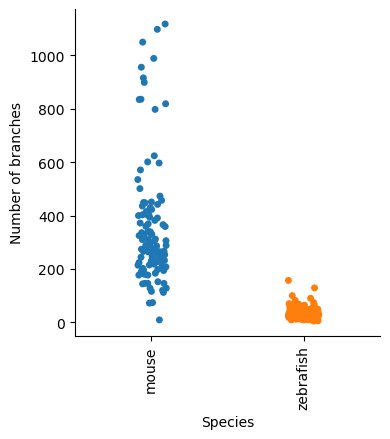

In [42]:
ax = sns.catplot(x="Species", y="Number of branches", data=mouse_zebra, height=4, aspect=1)
ax.set_xticklabels(rotation=90)
plt.show()

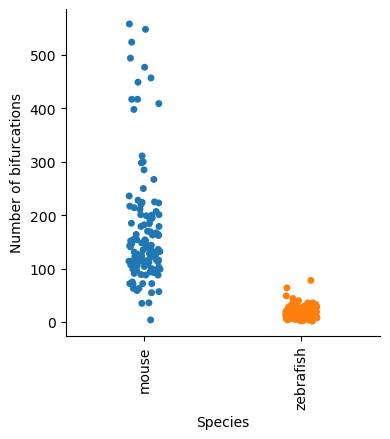

In [45]:
ax = sns.catplot(x="Species", y="Number of bifurcations", data=mouse_zebra, height=4, aspect=1)
ax.set_xticklabels(rotation=90)
plt.show()

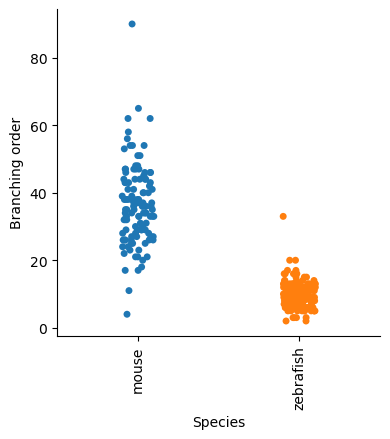

In [46]:
ax = sns.catplot(x="Species", y="Branching order", data=mouse_zebra, height=4, aspect=1)
ax.set_xticklabels(rotation=90)
plt.show()

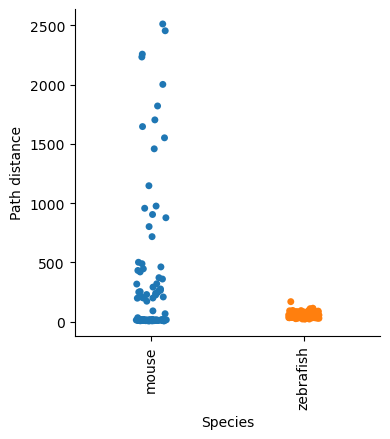

In [47]:
ax = sns.catplot(x="Species", y="Path distance", data=mouse_zebra, height=4, aspect=1)
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
# Last part of this .ipynb will show statistical testing with Mann-Whitney.
# Here we also show how in one cell of code you can simultaneously test and plot Mann-Whiteny test results
# using the whisker-box plot.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.814e-46 U_stat=2.050e+04


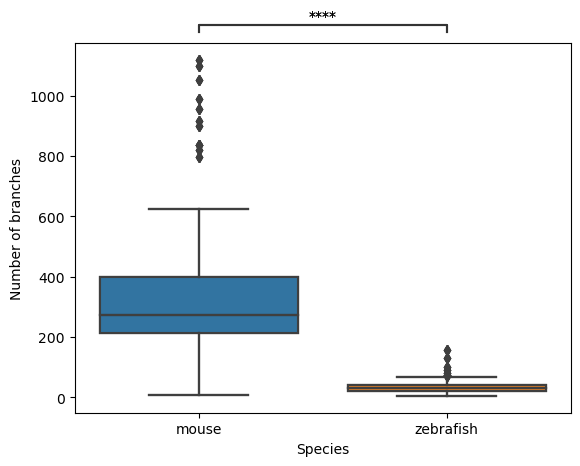

In [60]:
x = "Species"
y = "Number of branches"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Number of branches', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Number of branches', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.880e-02 U_stat=1.173e+04


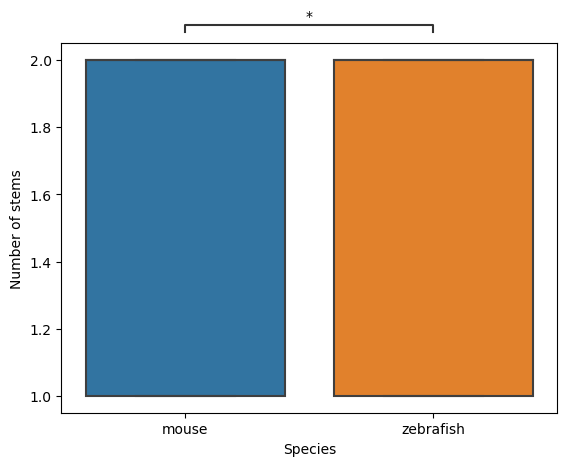

In [70]:
x = "Species"
y = "Number of stems"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Number of stems', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Number of stems', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.674e-46 U_stat=2.050e+04


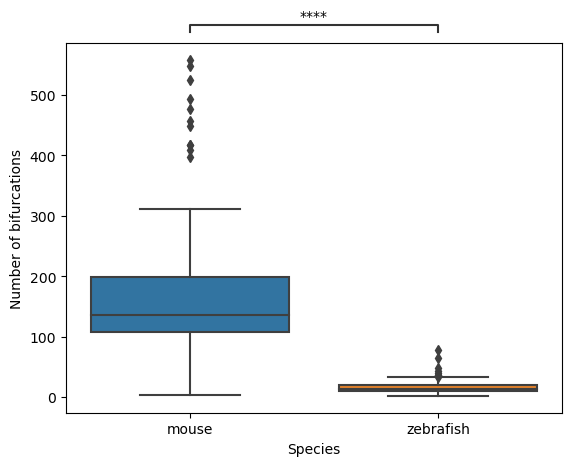

In [71]:
x = "Species"
y = "Number of bifurcations"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Number of bifurcations', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Number of bifurcations', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.155e-45 U_stat=2.042e+04


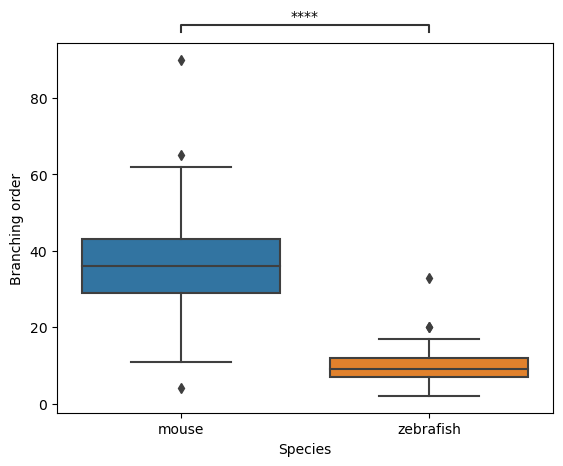

In [72]:
x = "Species"
y = "Branching order"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Branching order', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Branching order', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.611e-04 U_stat=7.663e+03


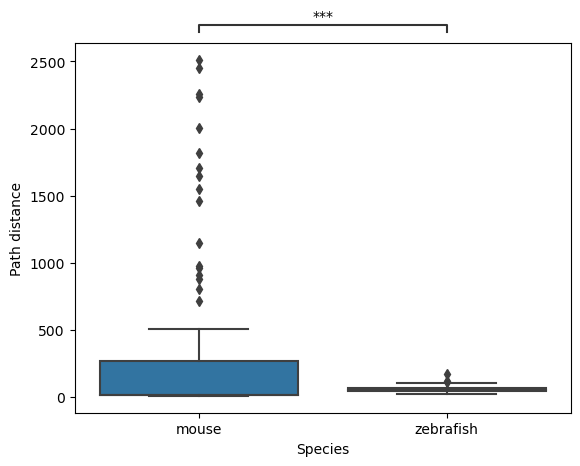

In [73]:
x = "Species"
y = "Path distance"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Path distance', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Path distance', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.241e-44 U_stat=2.022e+04


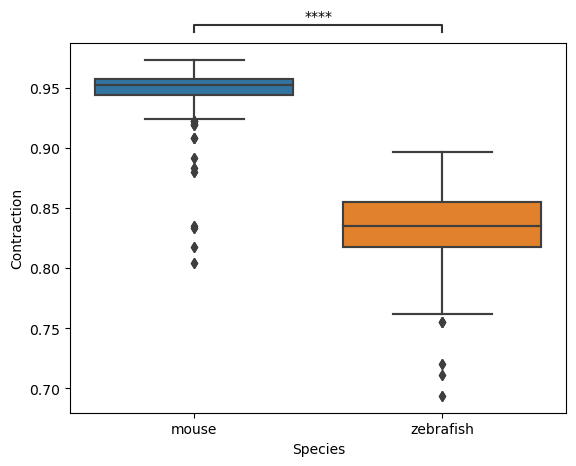

In [75]:
x = "Species"
y = "Contraction"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Contraction', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Contraction', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mouse v.s. zebrafish: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.618e-35 U_stat=1.916e+04


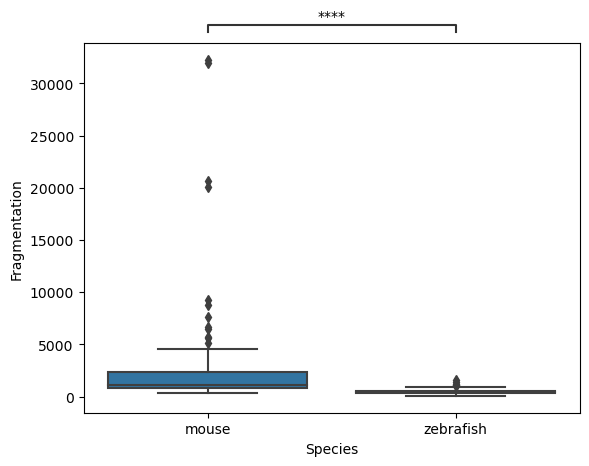

In [76]:
x = "Species"
y = "Fragmentation"
ax = sns.boxplot(data=mouse_zebra, x='Species', y='Fragmentation', order=['mouse', 'zebrafish'])
sigbox = add_stat_annotation(ax, data=mouse_zebra, x='Species', y='Fragmentation', order=['mouse', 'zebrafish'],
                                   test='Mann-Whitney', text_format='star',
                                 box_pairs=[("mouse", "zebrafish")],
                                   loc='outside', verbose=2)
sigbox_surface = sigbox 
plt.show()